In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sp500 = pd.read_csv("../Data/Raw Data/ScrapedSP500.csv")
# sp500 = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/SP500.csv")

In [2]:
days_to_predict = 20

In [3]:
print("First 10 Days of S&P500 Data\n", sp500.head(10))

First 10 Days of S&P500 Data
          Date         High          Low         Open        Close      Volume  \
0  2012-12-12  1438.589966  1426.760010  1427.839966  1428.479980  3709050000   
1  2012-12-13  1431.359985  1416.000000  1428.479980  1419.449951  3349960000   
2  2012-12-14  1419.449951  1411.880005  1419.449951  1413.579956  3210170000   
3  2012-12-17  1430.670044  1413.540039  1413.540039  1430.359985  3455610000   
4  2012-12-18  1448.000000  1430.469971  1430.469971  1446.790039  4302240000   
5  2012-12-19  1447.750000  1435.800049  1446.790039  1435.810059  3869800000   
6  2012-12-20  1443.699951  1432.819946  1435.810059  1443.689941  3686580000   
7  2012-12-21  1443.670044  1422.579956  1443.670044  1430.150024  5229160000   
8  2012-12-24  1430.150024  1424.660034  1430.150024  1426.660034  1248960000   
9  2012-12-26  1429.420044  1416.430054  1426.660034  1419.829956  2285030000   

     Adj Close  
0  1428.479980  
1  1419.449951  
2  1413.579956  
3  1430.35

Convert Date column to pandas datetime object, trim data to Jan 1 2022 and onward, and make chronological

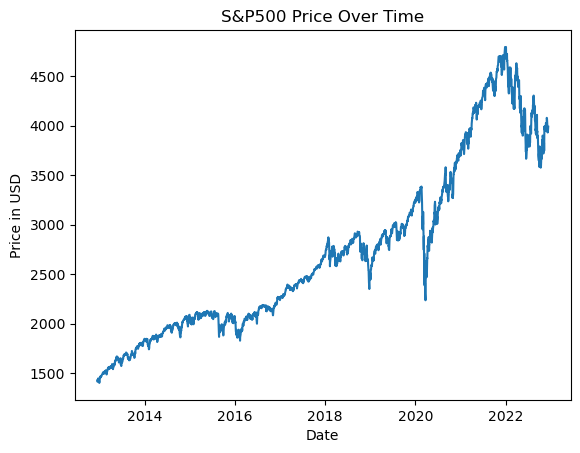

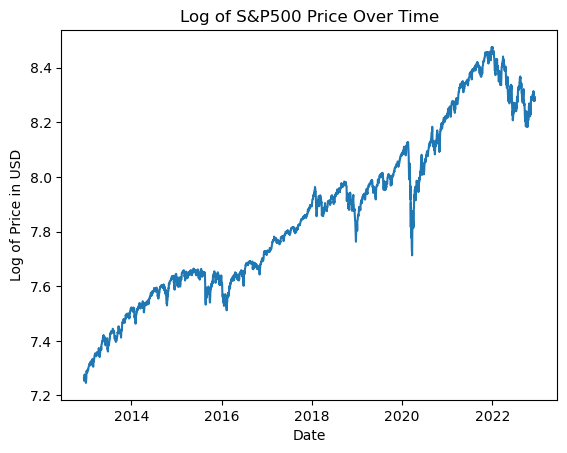

         Date         High          Low         Open        Close      Volume  \
0  2021-12-31  4786.830078  4765.750000  4775.209961  4766.180176  2677820000   
1  2021-12-30  4808.930176  4775.330078  4794.229980  4778.729980  3124950000   
2  2021-12-29  4804.060059  4778.080078  4788.640137  4793.060059  2963310000   
3  2021-12-28  4807.020020  4780.040039  4795.490234  4786.350098  2707920000   
4  2021-12-27  4791.490234  4733.990234  4733.990234  4791.189941  2770290000   

     Adj Close   DateTime  
0  4766.180176 2021-12-31  
1  4778.729980 2021-12-30  
2  4793.060059 2021-12-29  
3  4786.350098 2021-12-28  
4  4791.189941 2021-12-27  


In [4]:
sp500['DateTime'] = pd.to_datetime(sp500['Date'])
sp500['DateTime'] = np.where(sp500['DateTime'].dt.year > 2022, sp500['DateTime'] - pd.offsets.DateOffset(years=100), sp500['DateTime'])
# Anything after 2022 is changed to have 100 years subtracted because 2022 is the current year, change it as the years progress
plt.plot(sp500['DateTime'].loc[sp500['DateTime']>='1962-01-01'],sp500['Adj Close'].loc[sp500['DateTime']>='1962-01-01'])
plt.title("S&P500 Price Over Time")
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

plt.plot(sp500['DateTime'].loc[sp500['DateTime']>='1962-01-01'],np.log(sp500['Adj Close'].loc[sp500['DateTime']>='1962-01-01']))
plt.title("Log of S&P500 Price Over Time")
plt.xlabel('Date')
plt.ylabel('Log of Price in USD')
plt.show()

end_date = pd.to_datetime('2021-12-31')
start_date = end_date - pd.offsets.DateOffset(days = days_to_predict)-pd.offsets.DateOffset(years = 1)

sp500 = sp500.loc[(sp500['DateTime']>=start_date)&(sp500['DateTime']<=end_date)]
sp500 = sp500.loc[::-1].reset_index(drop=True)
print(sp500.head())

In [5]:
sp500

,Date,High,Low,Open,Close,Volume,Adj Close,DateTime
0,2021-12-31,4786.830078,4765.750000,4775.209961,4766.180176,2677820000,4766.180176,2021-12-31
1,2021-12-30,4808.930176,4775.330078,4794.229980,4778.729980,3124950000,4778.729980,2021-12-30
2,2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2963310000,4793.060059,2021-12-29
3,2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2707920000,4786.350098,2021-12-28
4,2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2770290000,4791.189941,2021-12-27
...,...,...,...,...,...,...,...,...
261,2020-12-17,3725.120117,3710.870117,3713.649902,3722.479980,4192810000,3722.479980,2020-12-17
262,2020-12-16,3711.270020,3688.570068,3696.250000,3701.169922,4067040000,3701.169922,2020-12-16
263,2020-12-15,3695.290039,3659.620117,3666.409912,3694.620117,4387080000,3694.620117,2020-12-15
264,2020-12-14,3697.610107,3645.840088,3675.270020,3647.489990,4623850000,3647.489990,2020-12-14


Perform Log Return Transformation

Transform price into log price for time series fitting

In [6]:
sp500['log_price'] = np.log(sp500['Adj Close'])

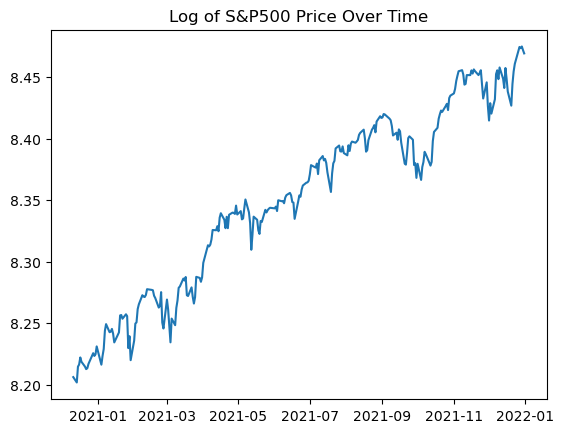

In [7]:
plt.plot(sp500['DateTime'],sp500['log_price'])
plt.title("Log of S&P500 Price Over Time")
plt.show()

Residuals are centered at 0 but not independent from time - there is periodicity

[-0.00092334]


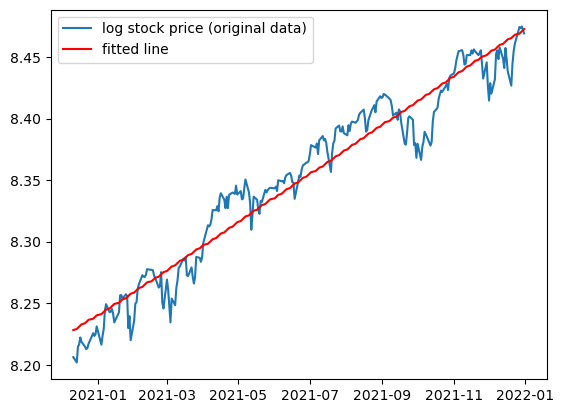

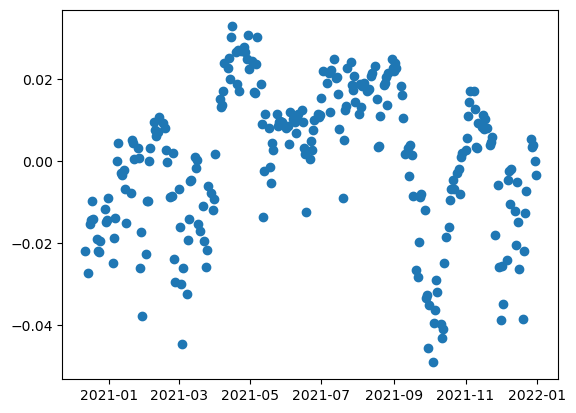

In [8]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
index = sp500.reset_index().index.values.reshape(-1,1)

clf.fit(index, sp500['log_price'])
print(clf.coef_) # To print the coefficient estimate of the series. 
linear_prediction = clf.predict(index)
plt.plot(sp500['DateTime'], sp500['log_price'], label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals = sp500['log_price'] - linear_prediction
plt.plot(sp500['DateTime'], linear_residuals, 'o')
plt.show();

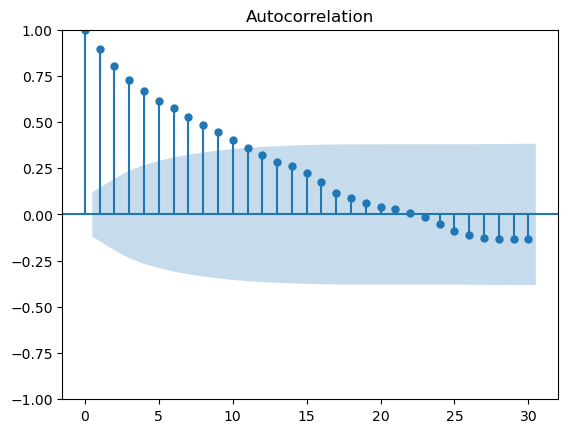

/Users/karanshah/miniconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


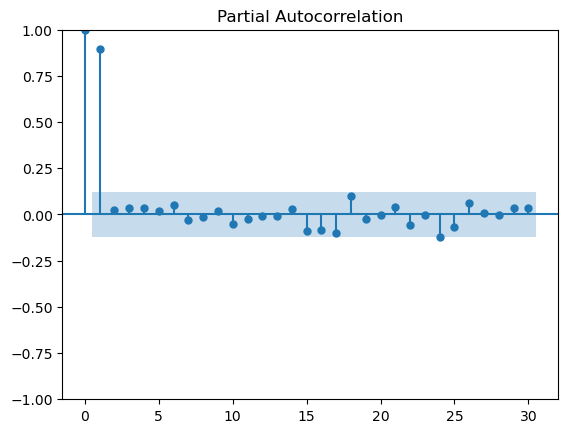

In [9]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(linear_residuals, lags=30)
plt.show()
sm.graphics.tsa.plot_pacf(linear_residuals, lags=30)
plt.show()

                               SARIMAX Results                                
Dep. Variable:              log_price   No. Observations:                  246
Model:                ARIMA(1, 0, 10)   Log Likelihood                 840.252
Date:                Tue, 13 Dec 2022   AIC                          -1654.503
Time:                        08:39:44   BIC                          -1608.934
Sample:                             0   HQIC                         -1636.154
                                - 246                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.006      0.151      0.880      -0.011       0.013
ar.L1          0.8982      0.067     13.432      0.000       0.767       1.029
ma.L1         -0.0338      0.086     -0.394      0.6

/Users/karanshah/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


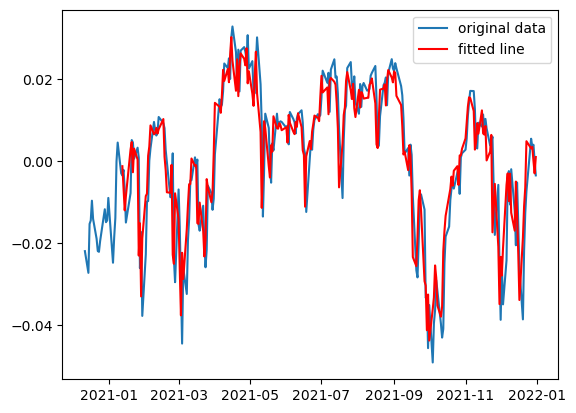

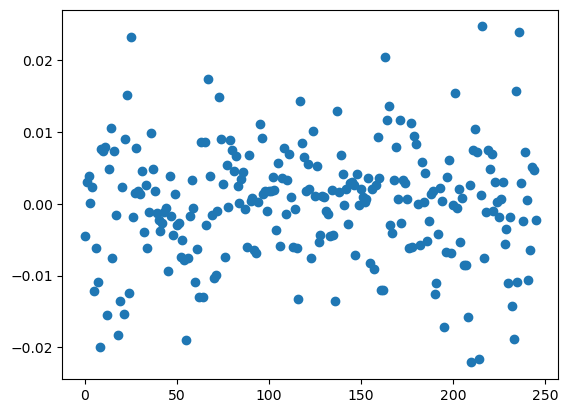

MSE with AR(1) model: 6.286026592617979e-05


In [10]:
from statsmodels.tsa.arima.model import ARIMA
AR_order = 1
AR_differentiation = 0
MA_order = 10

days_to_predict = 20
training_days = sp500.iloc[0:sp500.shape[0]-days_to_predict]['DateTime']
train_residuals = linear_residuals.iloc[0:sp500.shape[0]-days_to_predict]
sp500_arima = ARIMA(train_residuals, order=(AR_order, AR_differentiation, MA_order)).fit()
print(sp500_arima.summary())
ar_higher_predictions = sp500_arima.predict()
ar_higher_residuals = train_residuals - ar_higher_predictions
ar_higher_residuals = ar_higher_residuals # Fitting AR 1 model means removing one observation
plt.plot(sp500['DateTime'],linear_residuals, label='original data')
plt.plot(training_days,ar_higher_predictions, 'r', label='fitted line')
plt.legend()
plt.show()
plt.plot(ar_higher_residuals, 'o')
plt.show()
print("MSE with AR(1) model:", np.mean(ar_higher_residuals**2))


In [11]:
fcast = sp500_arima.get_forecast(days_to_predict).summary_frame()
forecast_means = fcast['mean']

train_and_predict = pd.concat([train_residuals,
                               forecast_means])

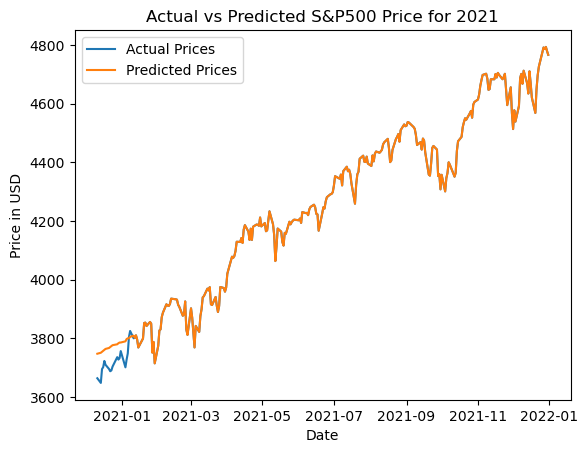

In [12]:
actual_prices = np.exp(linear_residuals+linear_prediction)
predicted_prices = np.exp(train_and_predict+linear_prediction)
plt.plot(sp500['DateTime'],actual_prices,label = 'Actual Prices')
plt.plot(sp500['DateTime'],predicted_prices,label = 'Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.show()

In [13]:
yhat = np.exp(linear_prediction[-days_to_predict:]+forecast_means)
yhat = yhat.to_numpy()
y = sp500['Adj Close'].to_numpy()[-days_to_predict:]

MAPE = 1/days_to_predict*np.sum(np.abs((yhat-y)/y))
RMSE = np.sqrt(1/days_to_predict*np.sum(np.linalg.norm(yhat-y)**2))
ET = np.abs(yhat[-1]-y[-1])

print(MAPE)
print(RMSE)
print(ET)


0.015238398136833984
62.187774589966715
83.61278811559805


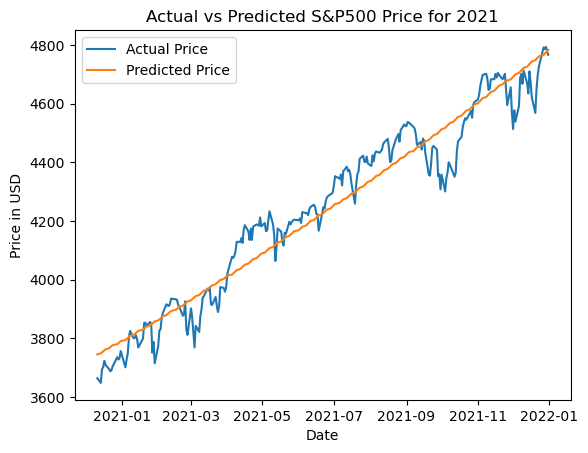

In [14]:
trivial_predict = np.exp(linear_prediction)
plt.plot(sp500['DateTime'],sp500['Adj Close'],label = 'Actual Price')
plt.plot(sp500['DateTime'],trivial_predict,label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.show()

In [15]:
yhat_trivial = np.exp(linear_prediction[-days_to_predict:])


MAPE_triv = 1/days_to_predict*np.sum(np.abs((yhat_trivial-y)/y))
RMSE_triv = np.sqrt(1/days_to_predict*np.sum(np.linalg.norm(yhat_trivial-y)**2))
ET_triv = np.abs(yhat_trivial[-1]-y[-1])

print(MAPE_triv)
print(RMSE_triv)
print(ET_triv)


0.015170904662611204
62.01236320310424
81.39186917718825
